## Exploration

In [1]:
import numpy as np

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


train.csv shape is  (139753, 9)
test.csv shape is  (17470, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        An Unexplained Anime Review   
1                                         not great.   
2                    Technical problem with this DVD   
3                          Heeeeyyyyy LAAAAADEEE!!!!   
4  Herzog the Great Trave

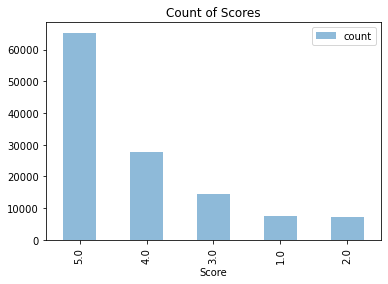

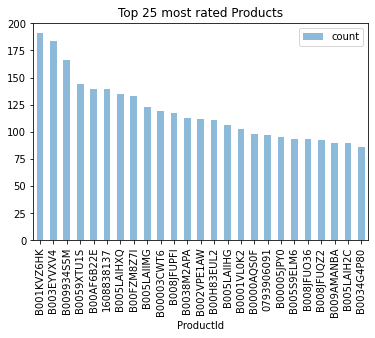

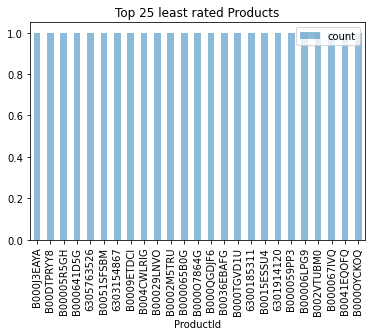

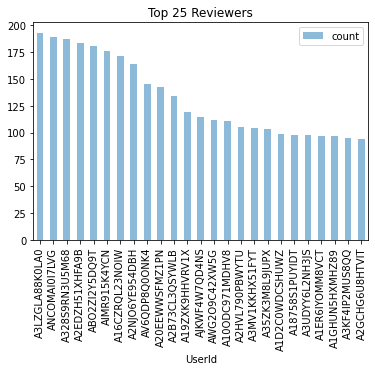

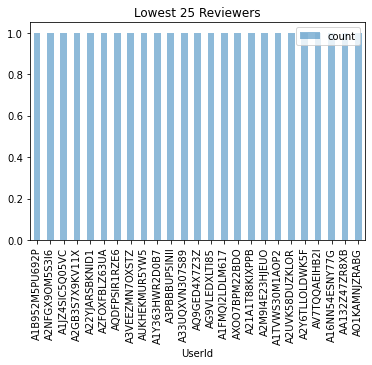

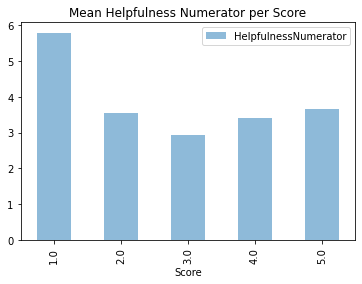

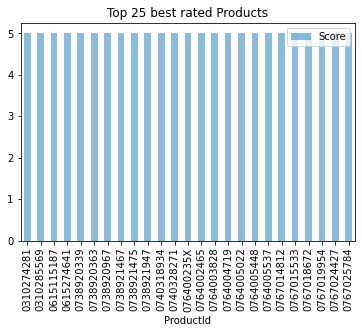

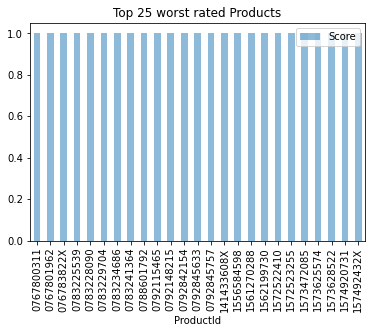

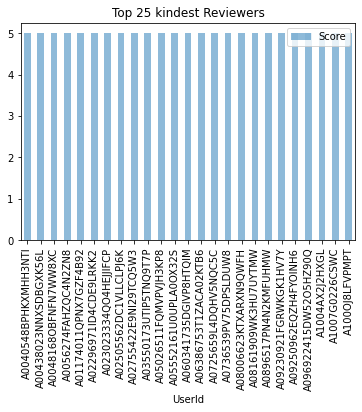

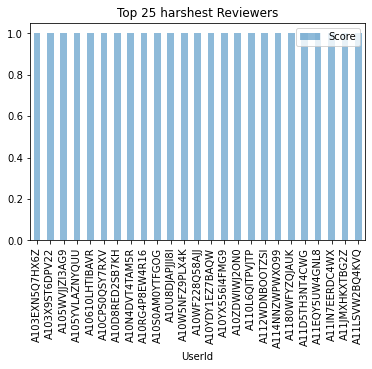

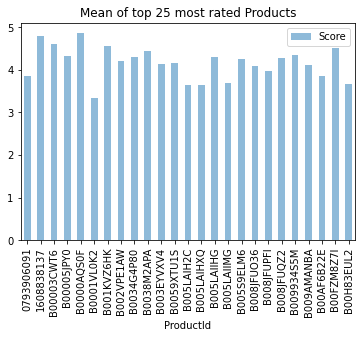

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

In [3]:
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,An Unexplained Anime Review,I was very anxious to see the Uncut version of...,2.0
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,not great.,Movie was okay...not great.,3.0
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,Technical problem with this DVD,"Like the Dinosaur Collector's Edition DVD, thi...",1.0
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,Heeeeyyyyy LAAAAADEEE!!!!,"Come on, now..... this has to be, by far, the...",5.0
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,Herzog the Great Traveler of both natural and ...,I've always been a great admirer of Herzog's o...,4.0


In [4]:
print(len(trainingSet['UserId'].unique()))
print(len(trainingSet['ProductId'].unique()))
selected_row = trainingSet[trainingSet['ProductId'] == "1890228583"]
summary = selected_row['Summary']
print(summary)

65269
34026
0                            An Unexplained Anime Review
1327      A very nice OVA with a somewhat familiar story
96196                                  A Little Too Much
118287                            Director's Cut version
Name: Summary, dtype: object


In [5]:
testingSet.head()

,Id,Score
0,786781,NaN
1,17153,NaN
2,1557328,NaN
3,1242666,NaN
4,1359242,NaN


In [6]:
sample = pd.read_csv('./data/sample.csv')
sample.head()

,Id,Score
0,786781,4.0
1,17153,4.0
2,1557328,4.0
3,1242666,4.0
4,1359242,4.0


## Feature Extraction

In [7]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[0-9]', "", text)
    text = re.sub(r'\n', " ", text)
    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    text = " ".join(text)
    return text

def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
    df['Summary'] = df['Summary'].apply(preprocess)
    df['Text'] = df['Text'].apply(preprocess)

    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
# submissionSet = pd.read_csv("./data/test.csv")

# # Merge on Id so that the test set can have feature columns as well
# testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
# testX = testX.drop(columns=['Score_x'])
# testX = testX.rename(columns={'Score_y': 'Score'})

# # The training set is where the score is not null
# trainX =  train_processed[train_processed['Score'].notnull()]

# # Save the datasets with the new features for easy access later
# testX.to_csv("./data/X_test.csv", index=False)
# trainX.to_csv("./data/X_train.csv", index=False)


In [9]:
train_processed = train_processed.dropna(subset=['Score'])

In [10]:
train_processed.shape

(122283, 11)

In [11]:
train_processed.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,an unexplained anime review,i wa very anxious to see the uncut version of ...,2.0,0.500000,234
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,not great.,movie wa okay...not great.,3.0,0.000000,4
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem with this dvd,"like the dinosaur collector's edition dvd, thi...",1.0,0.083333,26
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee!!!!,"come on, now..... this ha to be, by far, the b...",5.0,1.000000,157
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog the great traveler of both natural and ...,i've always been a great admirer of herzog's o...,4.0,1.000000,277


In [12]:
new_train_df = train_processed[['Text', 'Summary', 'ReviewLength', 'Score']]

In [13]:
X = new_train_df.iloc[:, :-1]
y = new_train_df.iloc[:, -1]

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
y_train.value_counts()

Score
5.0    52250
4.0    22254
3.0    11586
1.0     5889
2.0     5847
Name: count, dtype: int64

In [26]:
tfidf_text = TfidfVectorizer(max_features=20000)
tfidf_summary = TfidfVectorizer(max_features=20000)

In [32]:
x_train_text = x_train['Text']
x_test_text = x_test['Text']
x_train_text_tfidf = tfidf_text.fit_transform(x_train_text)
x_test_text_tfidf = tfidf_text.transform(x_test_text)

In [28]:
x_train_summary = x_train['Summary']
x_test_summary = x_test['Summary']
x_train_summary_tfidf = tfidf_summary.fit_transform(x_train_summary)
x_test_summary_tfidf = tfidf_summary.transform(x_test_summary)

In [18]:
import scipy
print(x_train_text_tfidf.shape)
print(x_train_summary_tfidf.shape)
new_xtrain_features = scipy.sparse.hstack([x_train_text_tfidf, x_train_summary_tfidf])
new_xtest_features = scipy.sparse.hstack([x_test_text_tfidf, x_test_summary_tfidf])
print(new_xtrain_features.shape)

(97826, 10000)
(97826, 10000)
(97826, 20000)


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5000)
# new_xtrain_features = 

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Creating your model

Accuracy on testing set =  0.6309441059819275
RMSE on testing set =  1.0649089898784996


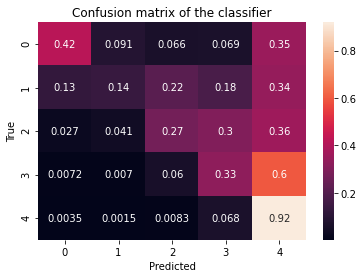

In [33]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# # Load training set with new features into DataFrame
# X_train = pd.read_csv("./data/X_train.csv")

# # Split training set into training and testing set
# X_train, X_test, Y_train, Y_test = train_test_split(
#         X_train.drop(['Score'], axis=1),
#         X_train['Score'],
#         test_size=1/4.0,
#         random_state=0
#     )

# # This is where you can do more feature selection
# X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
# X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])

# Learn the model
# model = KNeighborsClassifier(n_neighbors=20).fit(new_xtrain_features, y_train)
model = XGBClassifier().fit(new_xtrain_features, y_train_encoded)

# pickle model - saves it so you can load it later
with open('knn_20_model.obj', 'wb') as f:
        pickle.dump(model, f)
# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(new_xtest_features)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Create the Kaggle submission

In [36]:
X_submission = pd.read_csv("./data/X_test.csv")
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

X_submission['Score'] = model.predict(X_submission_processed)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

Now you can upload the `submission.csv` to kaggle